In [1]:
import cv2
from DLC_for_WBFM.utils.video_and_data_conversion.import_video_as_array import get_single_volume
import os
import matplotlib.pyplot as plt
import random
import numpy as np
import copy

In [2]:
# Get the 3d bigtiff folder
bigtiff_folder = r'D:\More-stabilized-wbfm'

btf_fname_red = r'test2020-10-22_16-15-20_test4-channel-0-pco_camera1\test2020-10-22_16-15-20_test4-channel-0-pco_camera1bigtiff.btf'
btf_fname_red = os.path.join(bigtiff_folder, btf_fname_red)


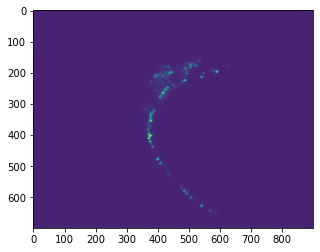

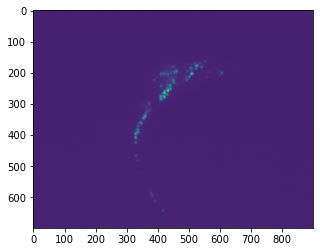

In [83]:
import_opt = {'num_slices':33, 'alpha':0.15, 'dtype':'uint8'}
which_slice = 12

img0_raw = get_single_volume(btf_fname_red, 0, **import_opt)[which_slice,...]
img1_raw = get_single_volume(btf_fname_red, 2, **import_opt)[which_slice,...]

plt.figure()
plt.imshow(img0_raw)
plt.figure()
plt.imshow(img1_raw)

In [93]:
detector_list = [
    cv2.ORB_create,
    cv2.ORB_create,
    cv2.xfeatures2d.SURF_create,
    cv2.xfeatures2d.DAISY_create,
    cv2.xfeatures2d.LATCH_create,
    cv2.xfeatures2d.VGG_create,
    cv2.xfeatures2d.FREAK_create,
    cv2.AKAZE_create
]

opt_list = [
    {'nfeatures':100000},
    {'nfeatures':100000, 'WTA_K':3},
    {'hessianThreshold':10},
    {'radius':5},
    {},
    {'scale_factor':0.75},
    {},
    {}
]

norm_list = [
    cv2.NORM_HAMMING,
    cv2.NORM_HAMMING2,
    cv2.NORM_L2,
    cv2.NORM_L2,
    cv2.NORM_L2,
    cv2.NORM_L2,
    cv2.NORM_L2,
    cv2.NORM_HAMMING
]

can_detect_kp = [1, 1, 0, 0, 0, 0, 1]

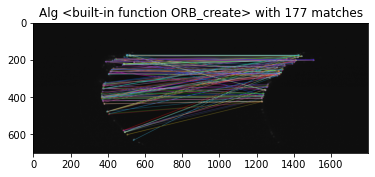

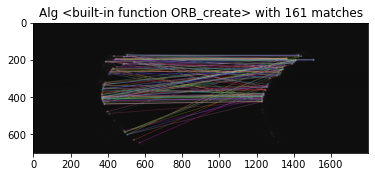

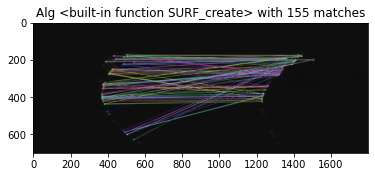

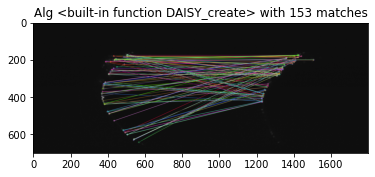

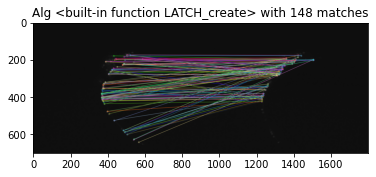

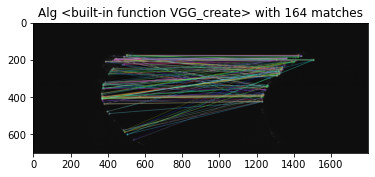

Alg <built-in function FREAK_create> failed


In [94]:
img0, img1 = copy.copy(img0_raw), copy.copy(img1_raw)

# Make "default" keypoints
tmp = cv2.ORB_create(10000)
kp0_default = tmp.detect(img0)
kp1_default = tmp.detect(img1)

for d, opt, norm, kp_bool in zip(detector_list, opt_list, norm_list, can_detect_kp):
    
    img0, img1 = copy.copy(img0_raw), copy.copy(img1_raw)
    try:
        detector = d(**opt)
        if kp_bool:
            kp0, d0 = detector.detectAndCompute(img0, None)
            kp1, d1 = detector.detectAndCompute(img1, None)
        else:
            # Use ORB keypoints
            kp0, d0 = detector.compute(img0, kp0_default)
            kp1, d1 = detector.compute(img1, kp1_default)

        matcher = cv2.BFMatcher(norm, crossCheck=True)
        matches = matcher.match(d0,d1)

        img3 = cv2.drawMatches(img0,kp0,img1,kp1,matches,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
        plt.imshow(img3)
        plt.title(f"Alg {d} with {len(matches)} matches")
        plt.show()
    except:
        print(f"Alg {d} failed")

# Now also do post-processing

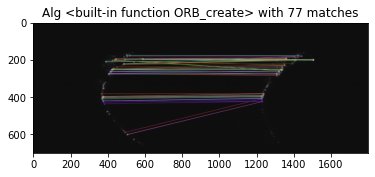

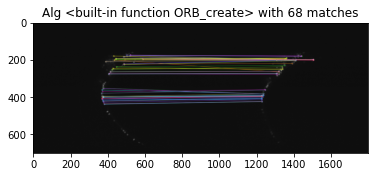

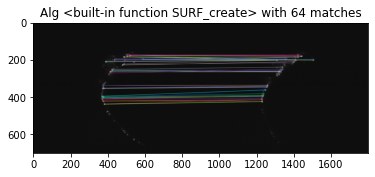

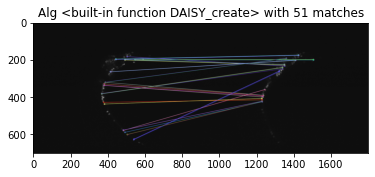

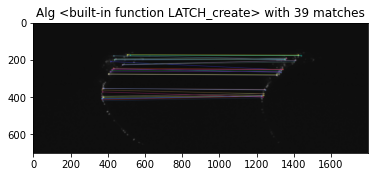

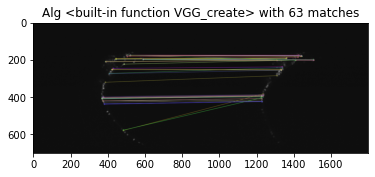

Alg <built-in function FREAK_create> failed


In [95]:
img0, img1 = copy.copy(img0_raw), copy.copy(img1_raw)

# Make "default" keypoints
tmp = cv2.ORB_create(10000)
kp0_default = tmp.detect(img0)
kp1_default = tmp.detect(img1)

for d, opt, norm, kp_bool in zip(detector_list, opt_list, norm_list, can_detect_kp):
    img0, img1 = copy.copy(img0_raw), copy.copy(img1_raw)
    try:
        detector = d(**opt)
        if kp_bool:
            kp0, d0 = detector.detectAndCompute(img0, None)
            kp1, d1 = detector.detectAndCompute(img1, None)
        else:
            # Use ORB keypoints
            kp0, d0 = detector.compute(img0, kp0_default)
            kp1, d1 = detector.compute(img1, kp1_default)

        matcher = cv2.BFMatcher(norm, crossCheck=True)
        matches = matcher.match(d0,d1)
        
        # NEW: use GMS
        opt = {'keypoints1':kp0,
               'keypoints2':kp1,
               'matches1to2':matches,
               'withRotation':False,
               'thresholdFactor':3.0}
        matches = cv2.xfeatures2d.matchGMS(img0.shape, img1.shape, **opt)

        img3 = cv2.drawMatches(img0,kp0,img1,kp1,matches,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
        plt.imshow(img3)
        plt.title(f"Alg {d} with {len(matches)} matches")
        plt.show()
    except:
        print(f"Alg {d} failed")

# ORB with different parameters

In [91]:
d = cv2.ORB_create

opt_list = [
    {'nfeatures':10000},
    {'nfeatures':10000, 'patchSize': 51, 'scaleFactor':1.2},
    {'nfeatures':10000, 'nlevels': 18, 'patchSize':51},
    {'nfeatures':10000, 'nlevels': 6},
    {'nfeatures':10000, 'scaleFactor': 1.1, 'nlevels':10},
    {'nfeatures':10000, 'fastThreshold':0}
]

norm = cv2.NORM_HAMMING

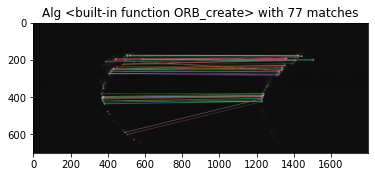

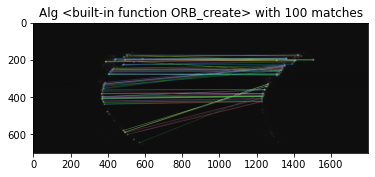

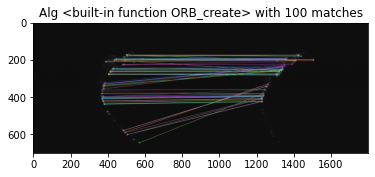

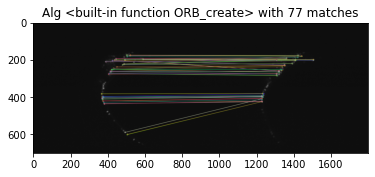

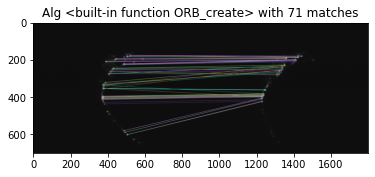

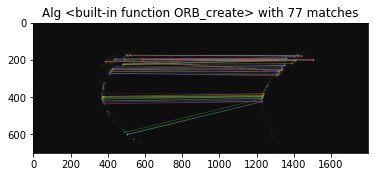

In [92]:
img0, img1 = copy.copy(img0_raw), copy.copy(img1_raw)

# Make "default" keypoints
tmp = cv2.ORB_create(10000)
kp0_default = tmp.detect(img0)
kp1_default = tmp.detect(img1)

for opt in opt_list:
    detector = d(**opt)
    # Use ORB keypoints
    kp0, d0 = detector.compute(img0, kp0_default)
    kp1, d1 = detector.compute(img1, kp1_default)

    matcher = cv2.BFMatcher(norm, crossCheck=True)
    matches = matcher.match(d0,d1)

    # NEW: use GMS
    opt = {'keypoints1':kp0,
           'keypoints2':kp1,
           'matches1to2':matches,
           'withRotation':False,
           'thresholdFactor':3.0}
    matches = cv2.xfeatures2d.matchGMS(img0.shape, img1.shape, **opt)

    img3 = cv2.drawMatches(img0,kp0,img1,kp1,matches,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.imshow(img3)
    plt.title(f"Alg {d} with {len(matches)} matches")
    plt.show()

# Separate test: optical flow